In [155]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg

In [156]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [157]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [158]:
np.random.seed(42)

x = dataset.data
y = dataset.target

indices = np.random.permutation(len(x))
test_size = 100

x_train = x[indices[:-test_size]]
y_train = y[indices[:-test_size]]

x_test = x[indices[-test_size:]]
y_test = y[indices[-test_size:]]

#### Formeln für die Lineare Regression:

$\beta = (X^TX)^{-1}X^Ty$  
$\hat{y} = X\beta$

In [170]:
# LinRegr Class
class LinearRegression:
    # LinRegr constructor
    def __init__(self, use_intercept=True):
        self.beta = None
        self.use_intercept = use_intercept
        
    def add_intercept(self, x):
        intercepts = np.ones(x.shape[0])
        x = np.column_stack((intercepts, x))
        return x
    
    def fit(self, x, y):
        if self.use_intercept == True:
            x = self.add_intercept(x)
        # Compute the closed Form
        inner = np.dot(x.T, x)
        inv = numpy.linalg.inv(inner)
        self.beta = np.dot(np.dot(inv, x.T), y)
        
    def predict(self, x):
        if x.shape[1] < self.beta.shape[0] and self.use_intercept == True:
            x = self.add_intercept(x)
        predictions = np.array([np.dot(x_i, self.beta) for x_i in x])
        return predictions
    
    def compute_r2(self, y, y_mean, y_pred):
        frac1 = sum([(y[i] - y_pred[i])**2 for i in range(y.shape[0])])
        frac2 = sum([(y[i] - y_mean)**2 for i in range(y.shape[0])])
        r2 = 1 - frac1 / frac2
        return r2
    
    def score(self, x, y):
        y_pred = self.predict(x)
        y_mean = np.mean(y)
        score = self.compute_r2(y, y_mean, y_pred)
        return score

In [172]:
regr = LinearRegression(use_intercept=True)
regr.fit(x_train, y_train)

print("Coeffs: ", regr.beta[1:])
print("Intercept: ", regr.beta[0])
print("R2: ", regr.score(x_test, y_test))

Coeffs:  [-1.03634958e-01  5.20174881e-02 -1.84070408e-02  2.31904591e+00
 -1.72854124e+01  3.60615634e+00  1.04201337e-02 -1.53285310e+00
  3.28088175e-01 -1.44990990e-02 -9.14708753e-01  8.67967981e-03
 -5.48167617e-01]
Intercept:  37.9615419404464
R2:  0.6857636836584603


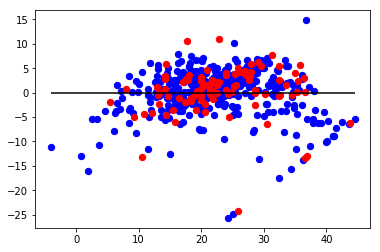

In [174]:
# Residual Plot (Restwert)

train_pred = regr.predict(x_train)
test_pred = regr.predict(x_test)

min_val = min(min(train_pred), min(test_pred))
max_val = max(max(train_pred), max(test_pred))

plt.scatter(train_pred, train_pred - y_train, color="blue", s=40)
plt.scatter(test_pred, test_pred - y_test, color="red", s=40)
plt.hlines(y=0, xmin=min_val, xmax=max_val)
plt.show()